# PERBANDINGAN METODE TRIPLE EXPONENTIAL SMOOTHING DAN AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (ARIMA) PADA PERAMALAN HARGA CRYPTOCURRENCY (STUDI KASUS: LIMA KOIN KRIPTO TERATAS)

1. Set-Up
2. EDA
3. Data Preprocessing
4. Tuning
5. Modelling
6. Evaluation


# Set-Up

## Import Library

In [159]:
# data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# z-core
from scipy import stats
# train test split
from pmdarima.model_selection import train_test_split

# metrics evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, classification_report,confusion_matrix, accuracy_score

# model
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Import Data

In [152]:
# data_btc = pd.read_csv("/home/user/forecast-tse-arima/dataset/BTC-USD.csv")
# data_eth = pd.read_csv("/home/user/forecast-tse-arima/dataset/ETH-USD.csv")
# data_bnb = pd.read_csv("/home/user/forecast-tse-arima/dataset/BNB-USD.csv")
# data_sol = pd.read_csv("/home/user/forecast-tse-arima/dataset/SOL-USD.csv")
# data_xrp = pd.read_csv("/home/user/forecast-tse-arima/dataset/XRP-USD.csv")
data_btc = pd.read_csv("dataset/BTC-USD.csv")
data_eth = pd.read_csv("dataset/ETH-USD.csv")
data_bnb = pd.read_csv("dataset/BNB-USD.csv")
data_sol = pd.read_csv("dataset/SOL-USD.csv")
data_xrp = pd.read_csv("dataset/XRP-USD.csv")

# EDA

In [142]:
# Read Data
data_btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
...,...,...,...,...,...,...,...
1090,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
1091,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
1092,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
1093,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945


In [143]:
data_btc.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1095.0,3.482320e+04,1.256097e+04,1.578230e+04,2.470548e+04,3.213887e+04,4.353272e+04,6.754973e+04
High,1095.0,3.561568e+04,1.292156e+04,1.625305e+04,2.521547e+04,3.332710e+04,4.418802e+04,6.878962e+04
Low,1095.0,3.395326e+04,1.213239e+04,1.559905e+04,2.427638e+04,3.103027e+04,4.256395e+04,6.638206e+04
Close,1095.0,3.483138e+04,1.255608e+04,1.578728e+04,2.469368e+04,3.218628e+04,4.355131e+04,6.756683e+04
Adj Close,1095.0,3.483138e+04,1.255608e+04,1.578728e+04,2.469368e+04,3.218628e+04,4.355131e+04,6.756683e+04
Volume,1095.0,3.180665e+10,2.053404e+10,5.331173e+09,1.863833e+10,2.783388e+10,3.851887e+10,3.509679e+11


In [144]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1095 non-null   object 
 1   Open       1095 non-null   float64
 2   High       1095 non-null   float64
 3   Low        1095 non-null   float64
 4   Close      1095 non-null   float64
 5   Adj Close  1095 non-null   float64
 6   Volume     1095 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.0+ KB


In [153]:
# Data Type Conversion
# Convert 'Date' to datetime if not already done
data_btc['Date'] = pd.to_datetime(data_btc['Date'])

#Feature Engineering
#Extract date parts
data_btc['year'] = data_btc['Date'].dt.year
data_btc['month'] = data_btc['Date'].dt.month
data_btc['day'] = data_btc['Date'].dt.day

data_btc


,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,2021,1,1
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,2021,1,2
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,2021,1,3
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,2021,1,4
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,2021,1,5
...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,2023,12,27
1091,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,2023,12,28
1092,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,2023,12,29
1093,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945,2023,12,30


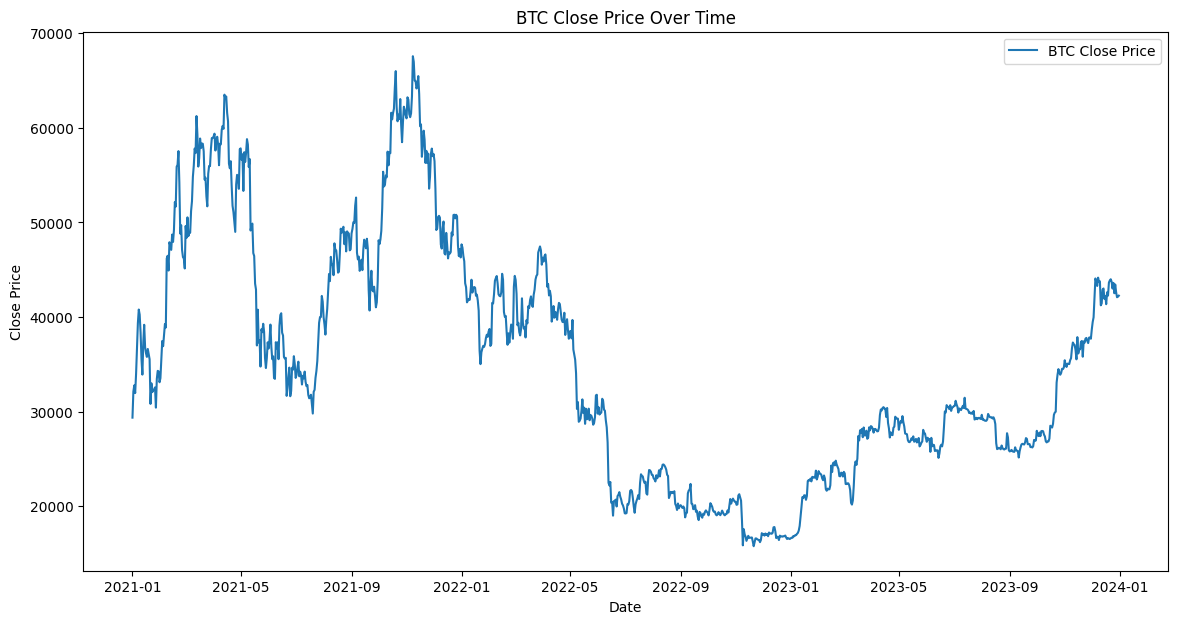

In [154]:
# visualisasi data close price / day
data_btc.set_index('Date', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(data_btc['Close'], label='BTC Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC Close Price Over Time')
plt.legend()
plt.show()


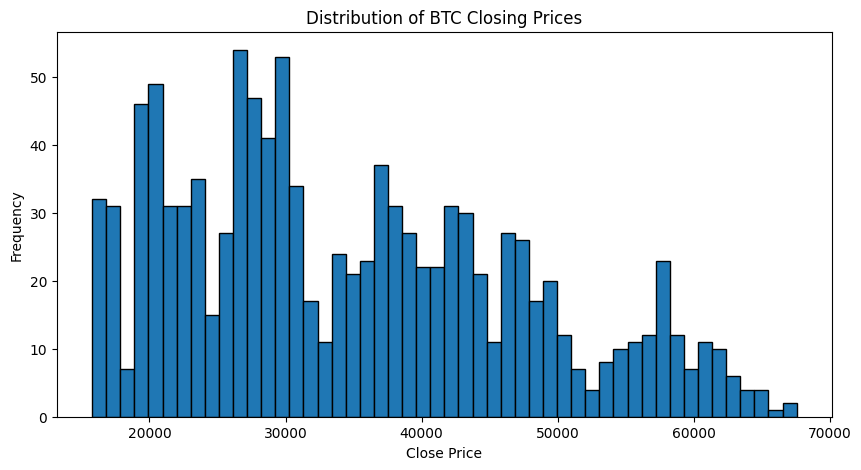

In [147]:
plt.figure(figsize=(10, 5))
plt.hist(data_btc['Close'], bins=50, edgecolor='k')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of BTC Closing Prices')
plt.show()


<Figure size 1200x600 with 0 Axes>

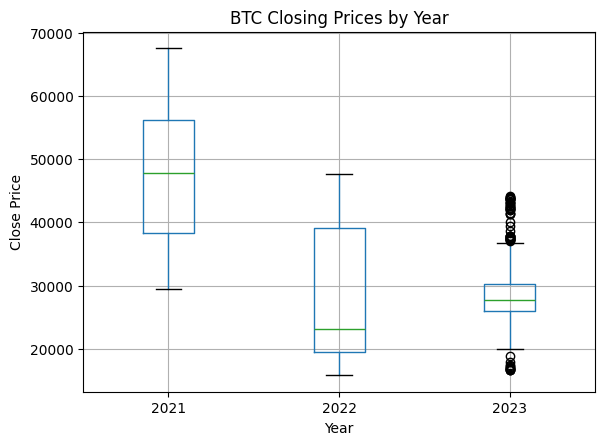

In [148]:
data_btc['Year'] = data_btc.index.year

plt.figure(figsize=(12, 6))
data_btc.boxplot(column='Close', by='Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('BTC Closing Prices by Year')
plt.suptitle('')  # Suppress the automatic title
plt.show()


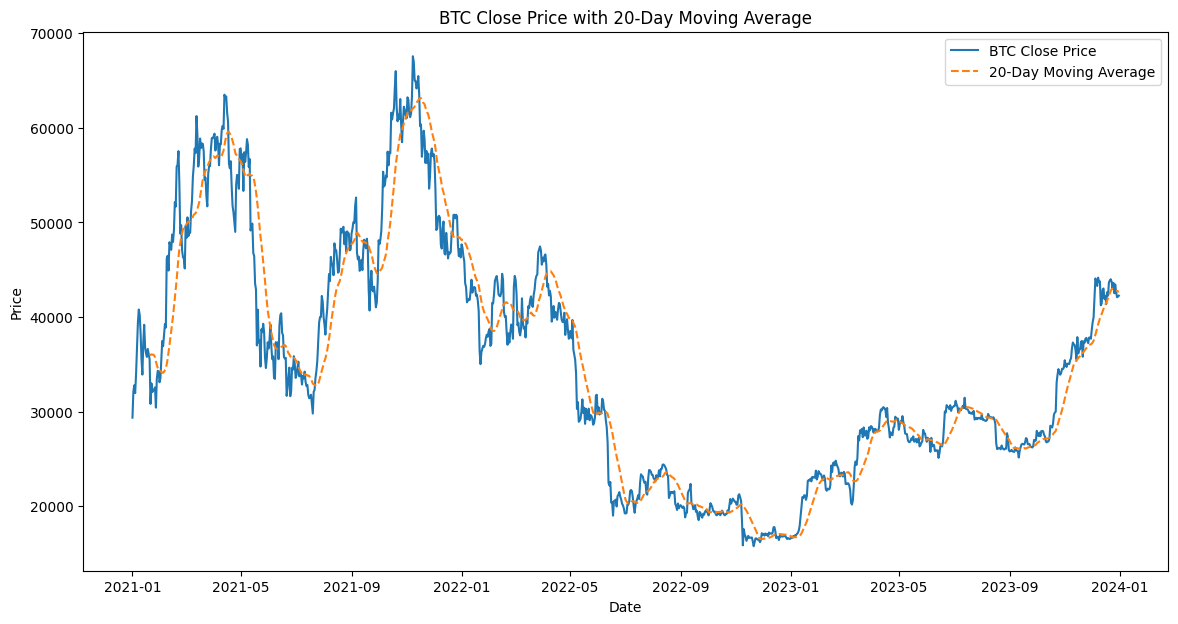

In [149]:
plt.figure(figsize=(14, 7))
plt.plot(data_btc['Close'], label='BTC Close Price')
plt.plot(data_btc['20_MA'], label='20-Day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BTC Close Price with 20-Day Moving Average')
plt.legend()
plt.show()


# Data Preprocessing

Steps for Data Preprocessing:
1. Handling Missing Values 
2. Handling Duplicates 
3. Data Type Conversion ✅
4. Feature Engineering ✅
5. Normalization/Scaling (Tidak dilakukan karena model-model ini biasanya bekerja dengan data mentah)
6. Handling Outliers

In [155]:
# Check for missing values
data_btc.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
month        0
day          0
dtype: int64

In [156]:
# Check for duplicates
print(f"Data memiliki {data_btc.shape[0]} baris dan {data_btc.shape[1]} kolom")
drop = data_btc.drop_duplicates()
print(f"Data setelah dihapus duplikat memiliki: {drop.shape[0]} baris dan {drop.shape[1]} kolom")

Data memiliki 1095 baris dan 9 kolom
Data setelah dihapus duplikat memiliki: 1095 baris dan 9 kolom


In [160]:
# Handling Outliers Z-Score
z_scores = np.abs(stats.zscore(data_btc[['Close']]))
data_btc = data_btc[(z_scores < 3).all(axis=1)]
print(data_btc.head())

                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914063   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   

               Adj Close       Volume  year  month  day  
Date                                                     
2021-01-01  29374.152344  40730301359  2021      1    1  
2021-01-02  32127.267578  67865420765  2021      1    2  
2021-01-03  32782.023438  78665235202  2021      1    3  
2021-01-04  31971.914063  81163475344  2021      1    4  
2021-01-05  33992.429688  67547324782  2021      1    5  


In [161]:
# Split train - test data
train_size = int(len(data_btc) * 0.8)
train_btc, test_btc = data_btc.iloc[:train_size], data_btc.iloc[train_size:]

print(f"Jumlah data train: {len(train_btc)} baris")
print(f"Jumlah data test: {len(test_btc)} baris")

# Save to CSV
train_btc.to_csv('train_btc.csv')
test_btc.to_csv('test_btc.csv')

# Show the data
print("Train Data:")
print(train_btc.head())
print("\nTest Data:")
print(test_btc.head())


Jumlah data train: 876 baris
Jumlah data test: 219 baris
Train Data:
                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914063   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   

               Adj Close       Volume  year  month  day  
Date                                                     
2021-01-01  29374.152344  40730301359  2021      1    1  
2021-01-02  32127.267578  67865420765  2021      1    2  
2021-01-03  32782.023438  78665235202  2021      1    3  
2021-01-04  31971.914063  81163475344  2021      1    4  
2021-01-05  33992.429688  67547324782  2021      1    5  

Test Data:
                    Op

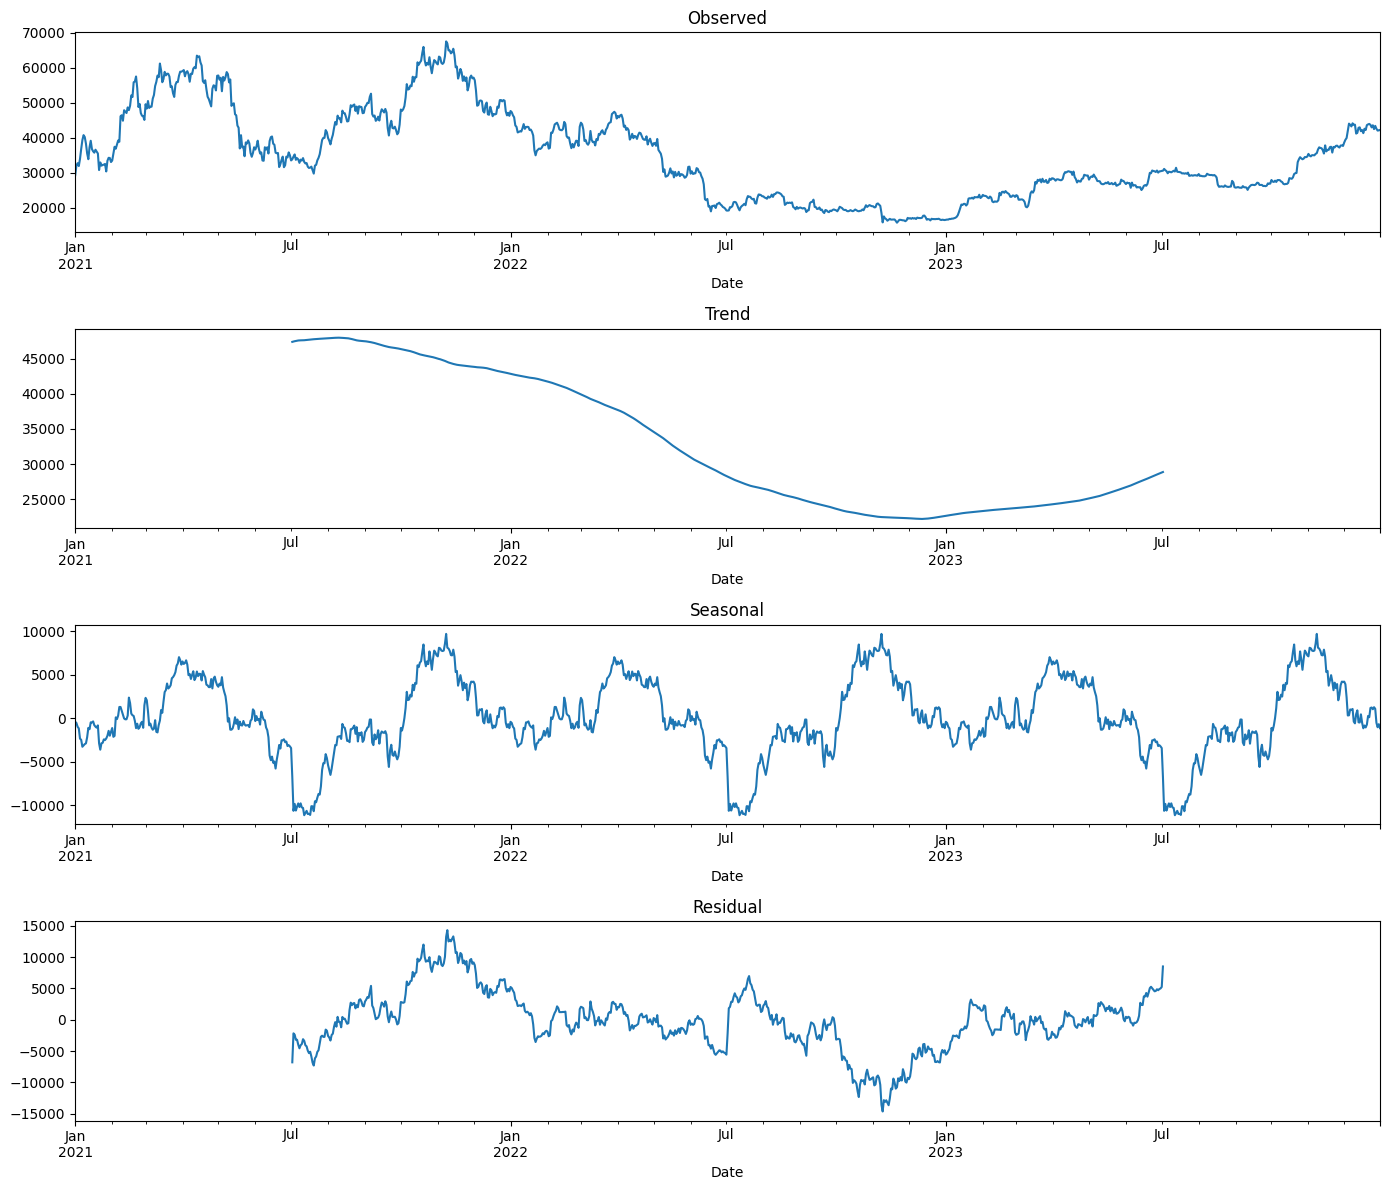

In [162]:
# Assuming data_btc['Close'] is your time series data
result = seasonal_decompose(data_btc['Close'], model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()


In [163]:
# Check for NaN values in the decomposed components
print("NaN in Trend component: ", result.trend.isna().sum())
print("NaN in Seasonal component: ", result.seasonal.isna().sum())
print("NaN in Residual component: ", result.resid.isna().sum())

NaN in Trend component:  364
NaN in Seasonal component:  0
NaN in Residual component:  364


# Tuning

# Modelling

## Triple Exponential Smoothing

## ARIMA

# Evaluation